<a href="https://colab.research.google.com/github/brotheroak/Tensorflow/blob/master/convert_mel_spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. mp3 파일을 wav 파일로 일괄변환

In [0]:
!pip install pydub

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import os,sys
#folder = '/content/gdrive/My Drive/dataset/case'
folder = '/content/gdrive/My Drive/dataset/complain'

for filename in os.listdir(folder):
       infilename = os.path.join(folder,filename)
       if not os.path.isfile(infilename): continue
       oldbase = os.path.splitext(filename)
       newname = infilename.replace('.tmp', '.mp3')
       output = os.rename(infilename, newname)

import os
import argparse

from pydub import AudioSegment

formats_to_convert = ['.mp3']

for (dirpath, dirnames, filenames) in os.walk("/content/gdrive/My Drive/dataset/complain"):
    for filename in filenames:
        if filename.endswith(tuple(formats_to_convert)):

            filepath = dirpath + '/' + filename
            (path, file_extension) = os.path.splitext(filepath)
            file_extension_final = file_extension.replace('.', '')
            try:
                track = AudioSegment.from_file(filepath,
                        file_extension_final)
                wav_filename = filename.replace(file_extension_final, 'wav')
                wav_path = dirpath + '/' + wav_filename
                print('CONVERTING: ' + str(filepath))
                file_handle = track.export(wav_path, format='wav')
                os.remove(filepath)
            except:
                print("ERROR CONVERTING " + str(filepath))

Wav length: 57.528, Mel_S shape:(1025, 5741)


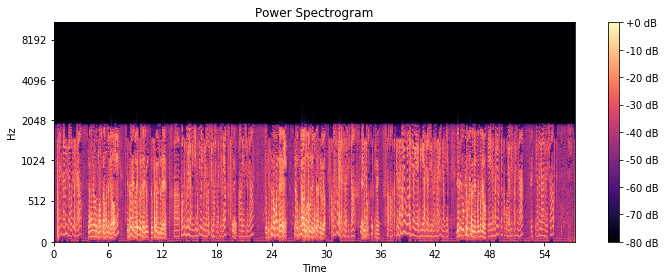

In [0]:

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

frame_length = 0.032
frame_stride = 0.010

y, sr = librosa.load(librosa.util.example_audio_file())

def STFT_S(wav_file):
    # STFT
    # sr: sampling radio default - 22050
    y, sr = librosa.load(wav_file, sr=16000)
    
    input_nfft = int(round(sr*frame_length))    
    input_stride = int(round(sr*frame_stride))

    S = np.abs(librosa.stft(y, center=False, hop_length=input_stride))
    
    print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))
    
    #Mel-Spectrogram plot
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Power Spectrogram')
    plt.tight_layout()
    plt.show()
    
   
    return S
  
man_original_data = '/content/gdrive/My Drive/dataset/complain/original/201801170479_20180117_105911_1966_1047.wav'
#Mel-Spectrogram 
mel_spec = STFT_S(man_original_data)


In [0]:
mel_spec

array([[2.01593730e-06, 4.08758706e-06, 6.88762066e-06, ...,
        1.01308501e+00, 1.02534235e+00, 1.01860547e+00],
       [2.01670537e-06, 4.11726978e-06, 6.90301704e-06, ...,
        9.98177469e-01, 1.01250362e+00, 1.00692773e+00],
       [2.01918033e-06, 4.20099877e-06, 6.96465986e-06, ...,
        9.68290448e-01, 9.82654572e-01, 9.78711367e-01],
       ...,
       [4.09341267e-12, 3.17659256e-13, 4.76254756e-12, ...,
        9.34967570e-09, 1.00104955e-08, 1.03395204e-08],
       [4.08934865e-12, 3.31037769e-13, 4.68387698e-12, ...,
        1.45607553e-08, 1.50215680e-08, 1.53222803e-08],
       [4.08769112e-12, 3.36262322e-13, 4.65238915e-12, ...,
        2.00025401e-08, 1.92729690e-08, 1.81860660e-08]], dtype=float32)

2. Mel Spectrogram 변환
* parameter 설명  
   - y: audio time-series. wav파일을 샘플링 주파수만큼 추출하여 저장
   - sr: sampling rate of y. 샘플링 주파수로 음성파일을 샘플링 시 추출하고자 하는 주파수의 2배만큼 샘플링.일반적으로 음성인 경우 16khz로 샘플링
   - s : Short-Time Fourier Transform하여 얻어진 magnitude와 phase 값
   - n_fft: 음성파일을 자르기 위한 window 사이즈. 즉 16kHz로 추출된 음성파일을 n_fft=512라면 초당 16000/512 = 약 31.25로 분리 
     frame_length = input_nfft/sr n_fft가 512일 경우 0.032 즉, 32ms, input_nfft = sr*frame_length
   - hop_length: 음성의 magnitude를 얼마나 겹친상태로 잘라 보여 줄 것인가. window_length - frame_stride 만큼 겹쳐서 추출
     즉, window_length가 0.025초 이고 frame_stride 가 0.010초 이면, 1칸은 0.015초가 겹치도록 해 총 700칸을 얻을 수 있음
   - n_mels:16khz의 음성 신호를 mel_s로 뽑으면 8khz의 주파수를 얻음, 이때 8khz주파수를 n_mels 크기만큼 나누어 줌

* 결과
   - Wav length: 57.528, Mel_S shape:(40, 5753)
   - 전체길이 58초, 0.01에 한칸으로 5753칸을 얻음

Wav length: 57.528, Mel_S shape:(40, 5753)


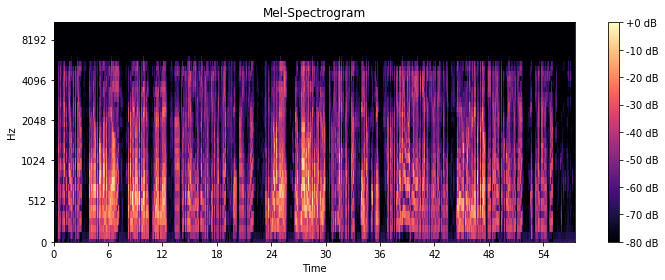

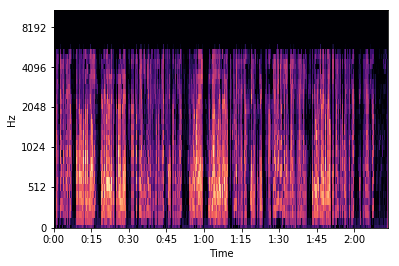

In [0]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

load_path ="/content/gdrive/My Drive/dataset/complain/mel"
save_path = f'{load_path.split(".")[0]}.png'

frame_length = 0.032
frame_stride = 0.010

def Mel_S(wav_file):
    # mel-spectrogram
    # sr: sampling radio default - 22050
    y, sr = librosa.load(wav_file, sr=16000)

    # wav_length = len(y)/sr
    input_nfft = int(round(sr*frame_length))    
    input_stride = int(round(sr*frame_stride))

    S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)

    print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))

    #Mel-Spectrogram plot
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.tight_layout()
    plt.savefig(save_path, bbox_inches=None, pad_inches=0, dpi=100)
    plt.show()
   
    return S
  
man_original_data = '/content/gdrive/My Drive/dataset/complain/original/201801170479_20180117_105911_1966_1047.wav'
#Mel-Spectrogram 
mel_spec = Mel_S(man_original_data)
# Log convert
log_S = librosa.logamplitude(mel_spec, ref_power=np.max)


In [0]:
mel_spec

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.14756384e-05, 2.06293675e-05, 3.64622556e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.27592523e-05, 1.28017689e-05, 5.46039437e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.87375483e-06, 3.49208188e-06, 3.00744414e-07],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.18630080e-18, 5.35620208e-19, 2.95635309e-11],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.01683370e-18, 2.82781684e-19, 2.40732792e-11],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.29998897e-19, 1.92282344e-19, 2.11266775e-11]])